In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ✅ Load FashionMNIST
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()



4422102/4422102 [==============================] - 13s 3us/step


In [ ]:

train_images = (train_images / 255.0 - 0.5) / 0.5
test_images = (test_images / 255.0 - 0.5) / 0.5


train_images = train_images.reshape(-1, 28*28)
test_images = test_images.reshape(-1, 28*28)


batch_size = 64
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(10000).batch(batch_size)
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

Epoch 1/10
938/938 [==============================] - 5s 4ms/step - loss: 0.4827 - accuracy: 0.8232 - val_loss: 0.4320 - val_accuracy: 0.8414
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3660 - accuracy: 0.8676 - val_loss: 0.4018 - val_accuracy: 0.8531
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3284 - accuracy: 0.8793 - val_loss: 0.3602 - val_accuracy: 0.8677
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3024 - accuracy: 0.8880 - val_loss: 0.3646 - val_accuracy: 0.8701
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2850 - accuracy: 0.8940 - val_loss: 0.3622 - val_accuracy: 0.8728
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2686 - accuracy: 0.8999 - val_loss: 0.3967 - val_accuracy: 0.8600
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2585 - accuracy: 0.9016 - val_loss: 0.3353 - val_accuracy: 0.8812
Epoch 

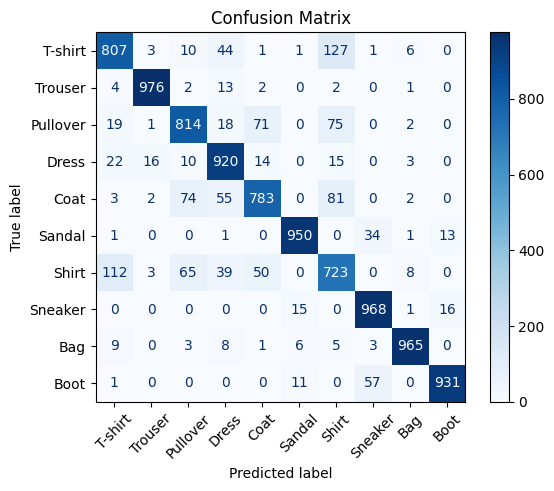

In [ ]:

model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


epochs = 10
history = model.fit(train_ds, epochs=epochs, validation_data=test_ds)


test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy:.4f}")


y_pred = np.argmax(model.predict(test_images), axis=1)
cm = confusion_matrix(test_labels, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[
    "T-shirt", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Boot"
])
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Boot"]


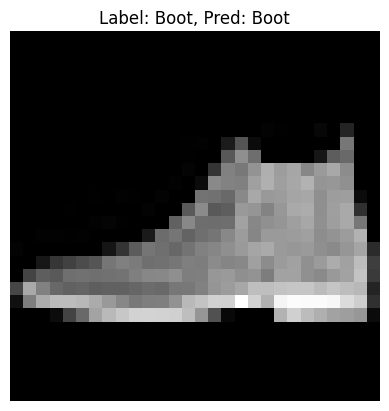

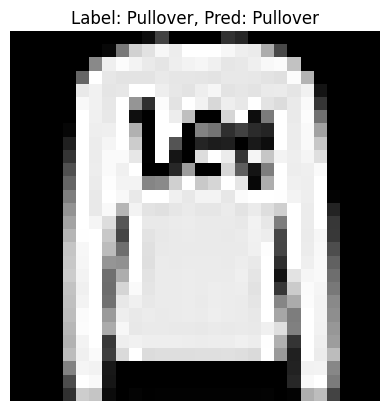

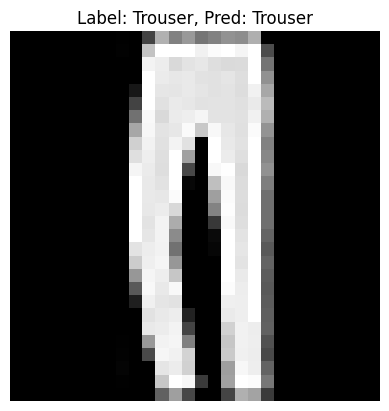

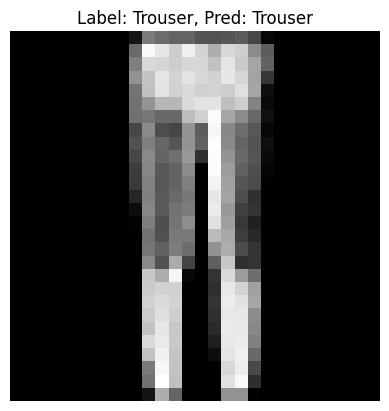

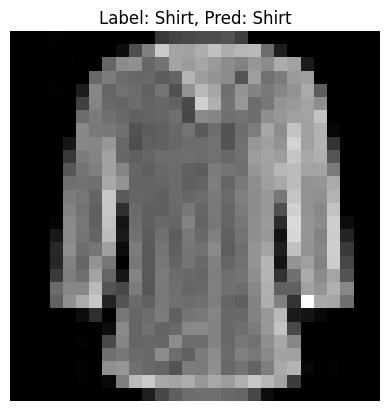

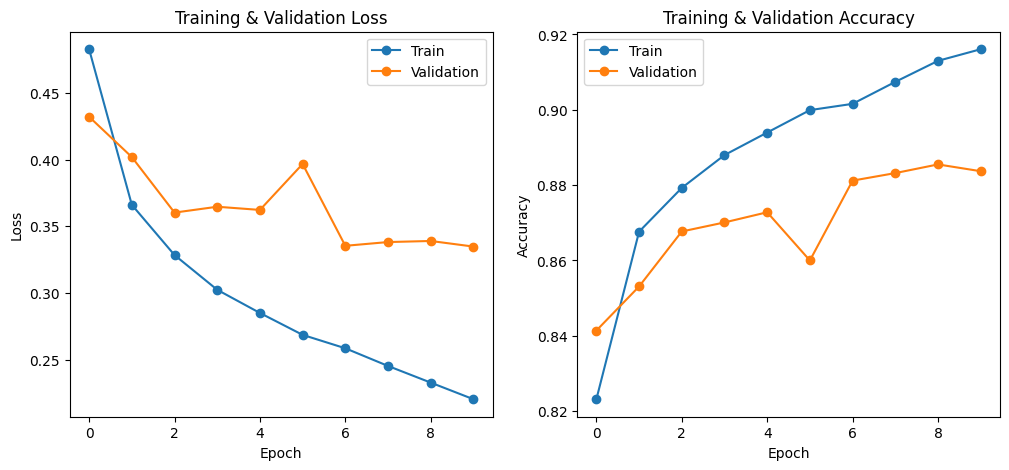

In [ ]:
def imshow(image, true, pred):
    plt.imshow((image.reshape(28,28) * 0.5 + 0.5), cmap='gray')
    plt.title(f"Label: {class_names[true]}, Pred: {class_names[pred]}")
    plt.axis('off')
    plt.show()

for i in range(5):
    imshow(test_images[i], test_labels[i], y_pred[i])


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], marker='o')
plt.plot(history.history['val_loss'], marker='o')
plt.title("Training & Validation Loss")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.legend(["Train", "Validation"])

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], marker='o')
plt.plot(history.history['val_accuracy'], marker='o')
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch"); plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])

plt.show()